# Creating a Diversified Stock Portfolio Using Clustering Analysis

### load in all libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import squarify 
import kaleido
from biokit.viz import corrplot

C:\Temp\dssyntrapxl\Lib\site-packages\biokit\__init__.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
# Import the dataset
stocks = pd.read_csv('C:/Temp/dssyntrapxl/data/stockcluster/data/sp500_companies.csv')
stocks.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,178.805,2933300133888,1.202330e+11,0.288,Cupertino,CA,United States,154000.0,"Apple Inc. designs, manufactures, and markets ...",0.068258
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software—Infrastructure,315.410,2368091979776,8.574500e+10,0.220,Redmond,WA,United States,181000.0,"Microsoft Corporation develops, licenses, and ...",0.055106
2,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,2875.010,1908210270208,8.519700e+10,0.410,Mountain View,CA,United States,150028.0,Larry Page and Sergey Brin founded Google in S...,0.044404
3,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,2863.440,1900754370560,8.519700e+10,0.410,Mountain View,CA,United States,150028.0,Larry Page and Sergey Brin founded Google in S...,0.044231
4,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,3400.700,1724658221056,6.040400e+10,0.153,Seattle,WA,United States,1468000.0,"Amazon.com, Inc. engages in the retail sale of...",0.040133


## Make TreeMaps

In [3]:
# Apply multiple aggregation functions
grouped = stocks.groupby(['Sector', 'Industry']).agg(Total_Sales=('Marketcap', 'sum'),)
grouped.reset_index(drop=False,inplace=True) 
grouped.head()


,Sector,Industry,Total_Sales
0,Basic Materials,Agricultural Inputs,104039554048
1,Basic Materials,Building Materials,50626422784
2,Basic Materials,Chemicals,78735762432
3,Basic Materials,Copper,73540984832
4,Basic Materials,Gold,62638522368


In [4]:
import plotly.express as px
fig = px.treemap(grouped, 
                 path=['Sector', 'Industry'], 
                 values='Total_Sales'
                )

fig.show()
# Saving the plot as a JPEG file
fig.write_image('C://Temp/dssyntrapxl/data/stockcluster/images/treemap.png', format='png')

## Barchart with weights

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator

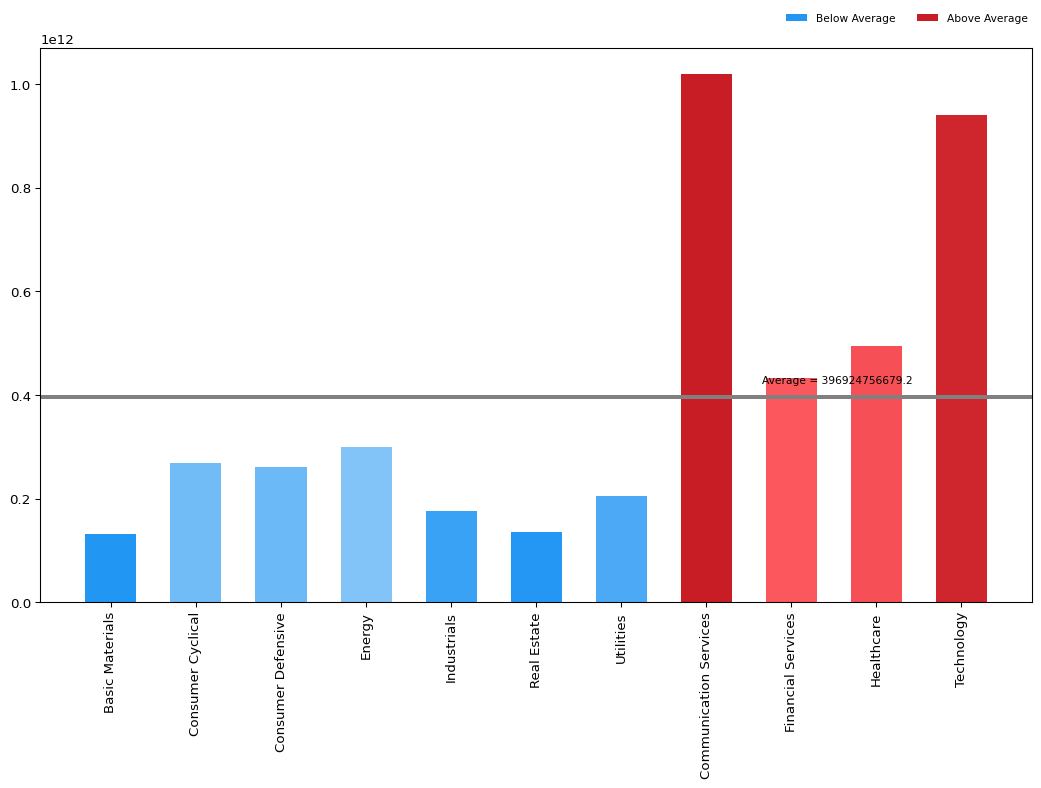

In [6]:
# Create the figure and axes objects, specify the size and the dots per inches 
fig, ax = plt.subplots(figsize=(13.33,7.5), dpi = 96)

# Group by Month and get the mean
avg_by_sector = grouped.groupby(['Sector']).agg(MktCap=('Total_Sales', 'mean'),)

# Find the average data point and split the series in 2
average = avg_by_sector['MktCap'].mean()
avg_by_sector.reset_index(inplace=True)
below_average = avg_by_sector[avg_by_sector['MktCap']<average]
above_average = avg_by_sector[avg_by_sector['MktCap']>=average]
# Colours - Choose the extreme colours of the colour map
colors_high = ["#ff5a5f", "#c81d25"] # Extreme colours of the high scale
colors_low = ["#2196f3","#bbdefb"] # Extreme colours of the low scale

# Colormap - Build the colour maps
cmap_low = mpl.colors.LinearSegmentedColormap.from_list("low_map", colors_low, N=256)
cmap_high = mpl.colors.LinearSegmentedColormap.from_list("high_map", colors_high, N=256)
norm_low = mpl.colors.Normalize(below_average['MktCap'].min(), average) # linearly normalizes data into the [0.0, 1.0] interval
norm_high = mpl.colors.Normalize(average, above_average['MktCap'].max())

# Plot bars and average (horizontal) line
bar1 = ax.bar(below_average['Sector'], below_average['MktCap'], color=cmap_low(norm_low(below_average['MktCap'])), width=0.6, label='Below Average', zorder=2)
bar2 = ax.bar(above_average['Sector'], above_average['MktCap'], color=cmap_high(norm_high(above_average['MktCap'])), width=0.6, label='Above Average', zorder=2)
plt.xticks(rotation=90)
plt.axhline(y=average, color = 'grey', linewidth=3)

# Determine the y-limits of the plot
ymin, ymax = ax.get_ylim()
# Calculate a suitable y position for the text label
y_pos = average/ymax + 0.03
# Annotate the average line
ax.text(0.88, y_pos, f'Average = {average:.1f}', ha='right', va='center', transform=ax.transAxes, size=8, zorder=3)

# Add legend
ax.legend(loc="best", ncol=2, bbox_to_anchor=[1, 1.07], borderaxespad=0, frameon=False, fontsize=8)
fig.savefig('C://Temp/dssyntrapxl/data/stockcluster/images/barchart.png', format='png')

## Exploring intra feature correlation matrix using correlogram

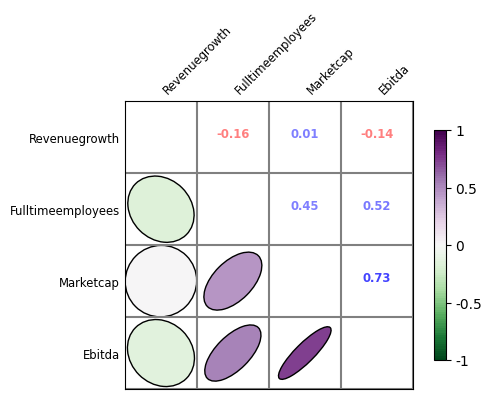

In [7]:
corr = stocks[['Marketcap','Ebitda','Revenuegrowth','Fulltimeemployees']].corr(method='spearman')
c = corrplot.Corrplot(corr)
c.plot(method='ellipse', cmap='PRGn_r', shrink=1, rotation=45, upper='text', lower='ellipse')
fig = plt.gcf()
fig.set_size_inches(5,4);
fig.savefig('C://Temp/dssyntrapxl/data/stockcluster/images/correlogram.png', format='png')

## Create some plots

## Marketcap

In [8]:
## Remove Outliers IQR
percentile25 = stocks['Marketcap'].quantile(0.25)
percentile75 = stocks['Marketcap'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit", upper_limit)
print("Lower limit", lower_limit)
new_df = stocks[(stocks['Marketcap'] < upper_limit) & (stocks['Marketcap'] > lower_limit)]

Upper limit 142369073664.0
Lower limit -55942546944.0


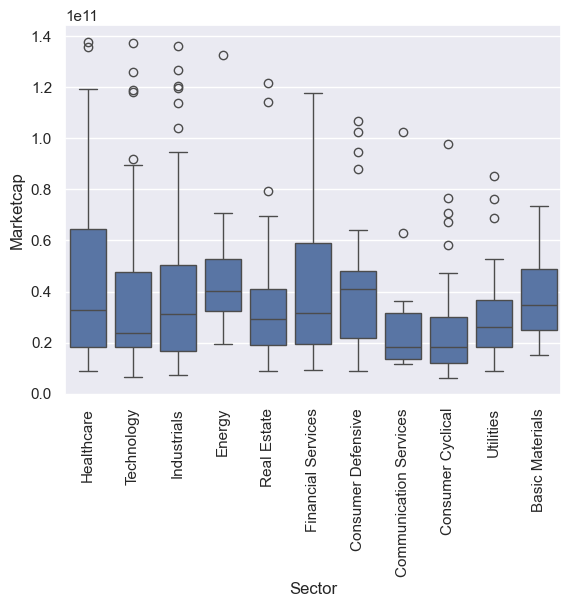

In [9]:
sns.set_theme(style="darkgrid")
sns.boxplot(x=new_df["Sector"], y=new_df["Marketcap"])
plt.xticks(rotation = 90)
plt.savefig('C://Temp/dssyntrapxl/data/stockcluster/images/box_mkt.png', format='png')
plt.show()

## FullTimeemployees

In [10]:
percentile25 = stocks['Fulltimeemployees'].quantile(0.25)
percentile75 = stocks['Fulltimeemployees'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit", upper_limit)
print("Lower limit", lower_limit)
new_df = stocks[(stocks['Fulltimeemployees'] < upper_limit) & (stocks['Fulltimeemployees'] > lower_limit)]

Upper limit 120750.75
Lower limit -57283.25


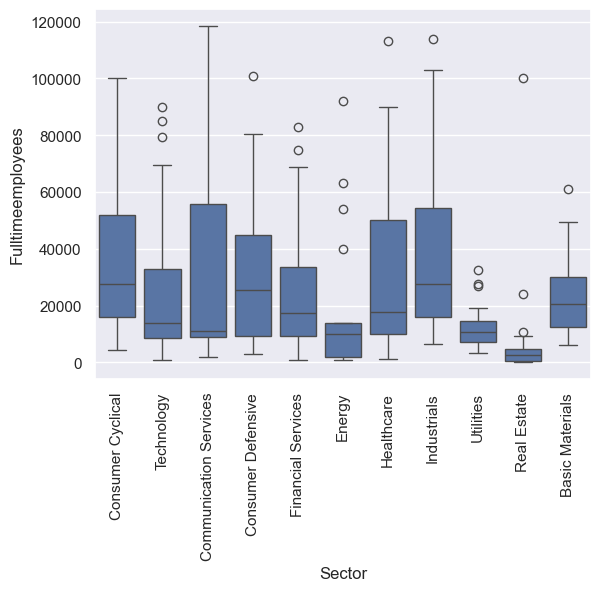

In [11]:
sns.set_theme(style="darkgrid")
sns.boxplot(x=new_df["Sector"], y=new_df["Fulltimeemployees"])
plt.xticks(rotation = 90)
plt.savefig('C://Temp/dssyntrapxl/data/stockcluster/images/box_emp.png', format='png')
plt.show()